---
# Multivariate Analysis
## Age at Injury vs. Average Weekly Wage


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [5]:
train_data = pd.read_csv('train_data.csv', index_col='Claim Identifier')
test_data = pd.read_csv('test_data.csv', index_col='Claim Identifier')

C:\Users\inesm\AppData\Local\Temp\ipykernel_312\3470921380.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train_data.csv', index_col='Claim Identifier')


In [6]:
#drop target variable
df = train_data.drop(columns='Claim Injury Type')

## 2.1.7 Multivariate Analysis

### Gender vs Attorney/Representative

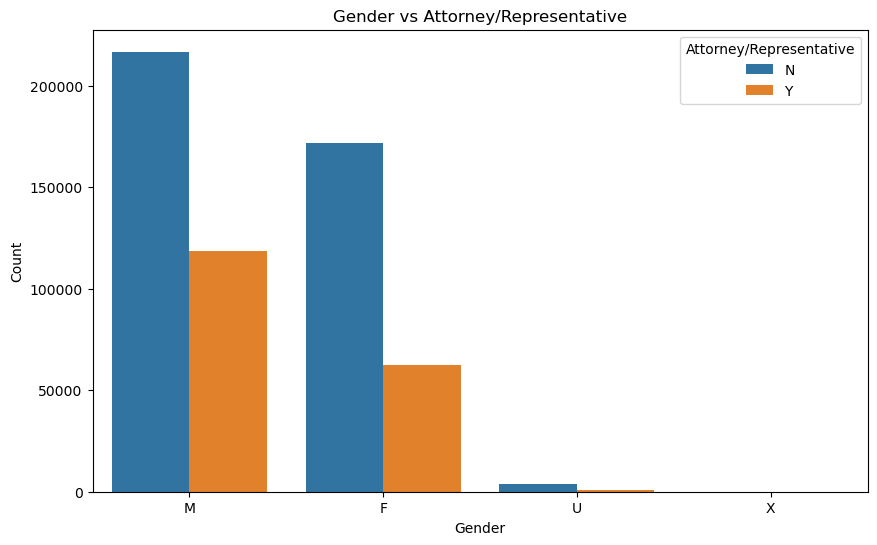

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Attorney/Representative', data=train_data)
plt.title('Gender vs Attorney/Representative')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Attorney/Representative')
plt.show()

Observation: The proportion is almost the same compared with the amount of M/F/U/X so we cannot say there's descriminations towards a specific gender and the opportunity to have an attorney

### WCIO Cause of Injury Code by Gender

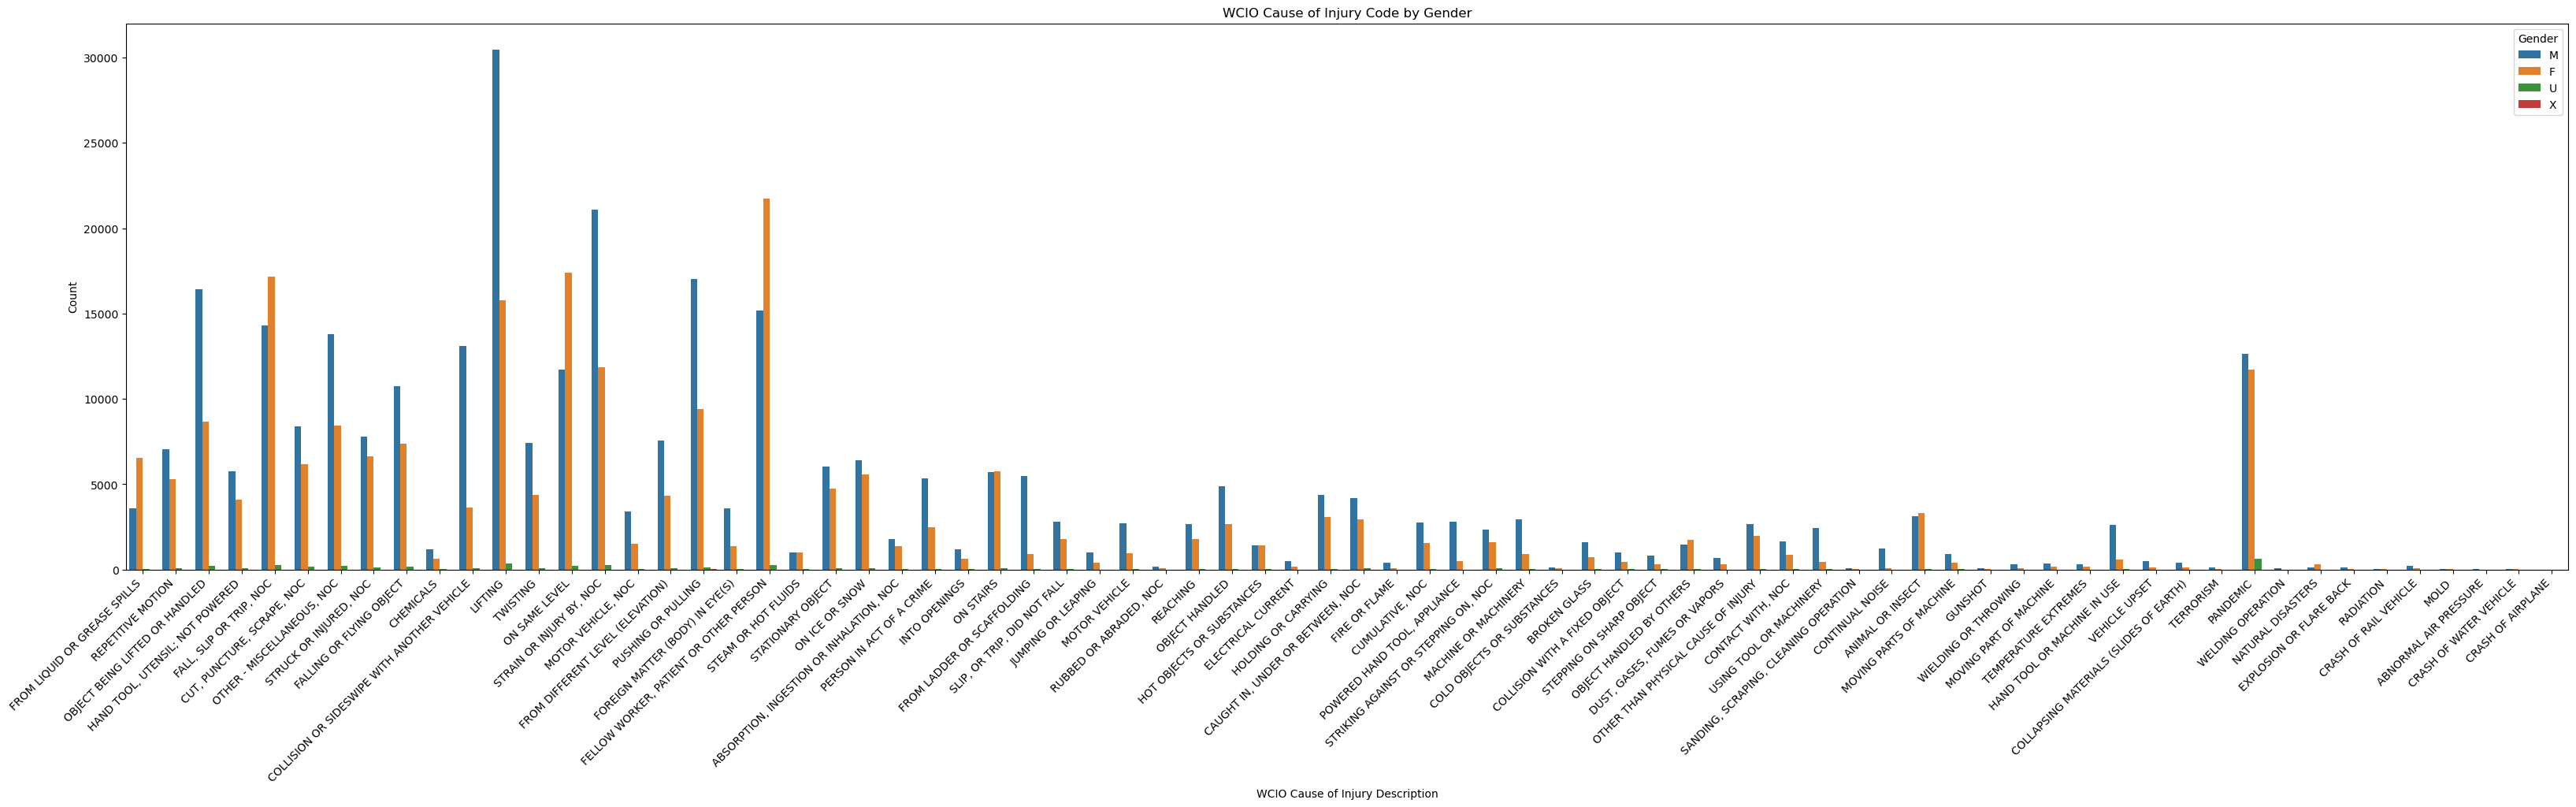

In [24]:
# WCIO Cause of Injury Code by Gender
plt.figure(figsize=(40, 9))
sns.countplot(x='WCIO Cause of Injury Description', hue='Gender', data=train_data)
plt.title('WCIO Cause of Injury Code by Gender')
plt.xlabel('WCIO Cause of Injury Description')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45, ha='right')
plt.show()

### Average Weekly Wage by Gender

C:\Users\inesm\AppData\Local\Temp\ipykernel_13372\1260294283.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Gender', y='Average Weekly Wage', data=train_data, estimator=np.mean, ci='sd', capsize=0.1)


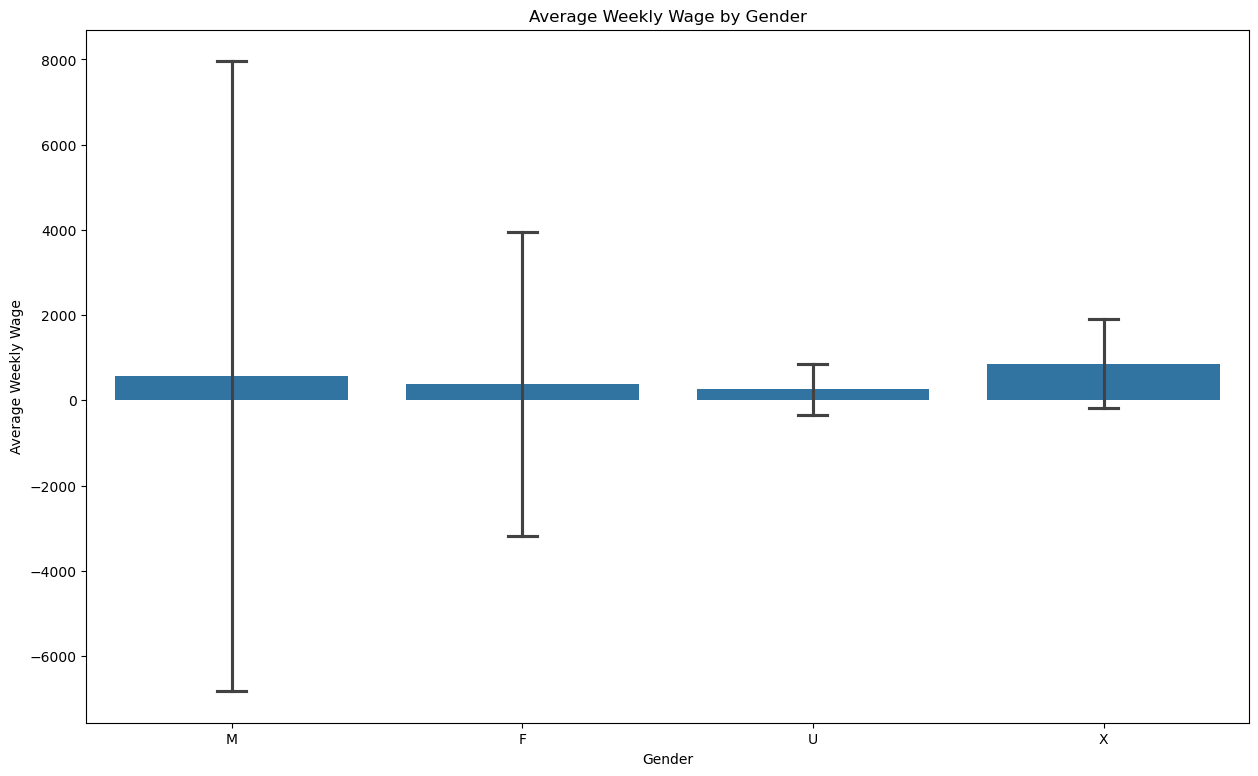

In [28]:
# Average Weekly Wage by Gender
plt.figure(figsize=(15, 9))
sns.barplot(x='Gender', y='Average Weekly Wage', data=train_data, estimator=np.mean, ci='sd', capsize=0.1)
plt.title('Average Weekly Wage by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Weekly Wage')
plt.show()

Everything that has the feature "Average Weekly Wage" has to be taken carefully because of the amount of zeros

### Average Weekly Wage by Attorney/Representative

C:\Users\inesm\AppData\Local\Temp\ipykernel_13372\2323922959.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Attorney/Representative', y='Average Weekly Wage', data=train_data, estimator=np.mean, ci='sd', capsize=0.1)


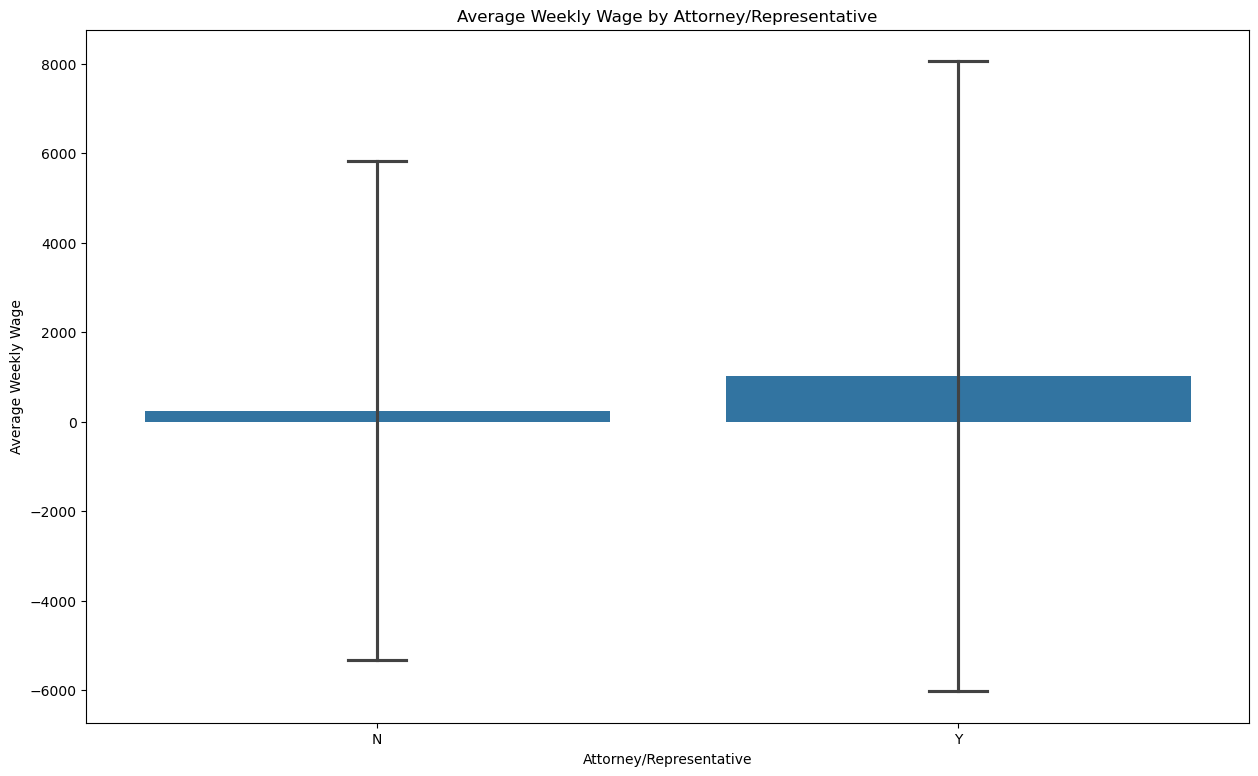

In [29]:
plt.figure(figsize=(15, 9))
sns.barplot(x='Attorney/Representative', y='Average Weekly Wage', data=train_data, estimator=np.mean, ci='sd', capsize=0.1)
plt.title('Average Weekly Wage by Attorney/Representative')
plt.xlabel('Attorney/Representative')
plt.ylabel('Average Weekly Wage')
plt.show()

### Distribution of Claims by County of Injury

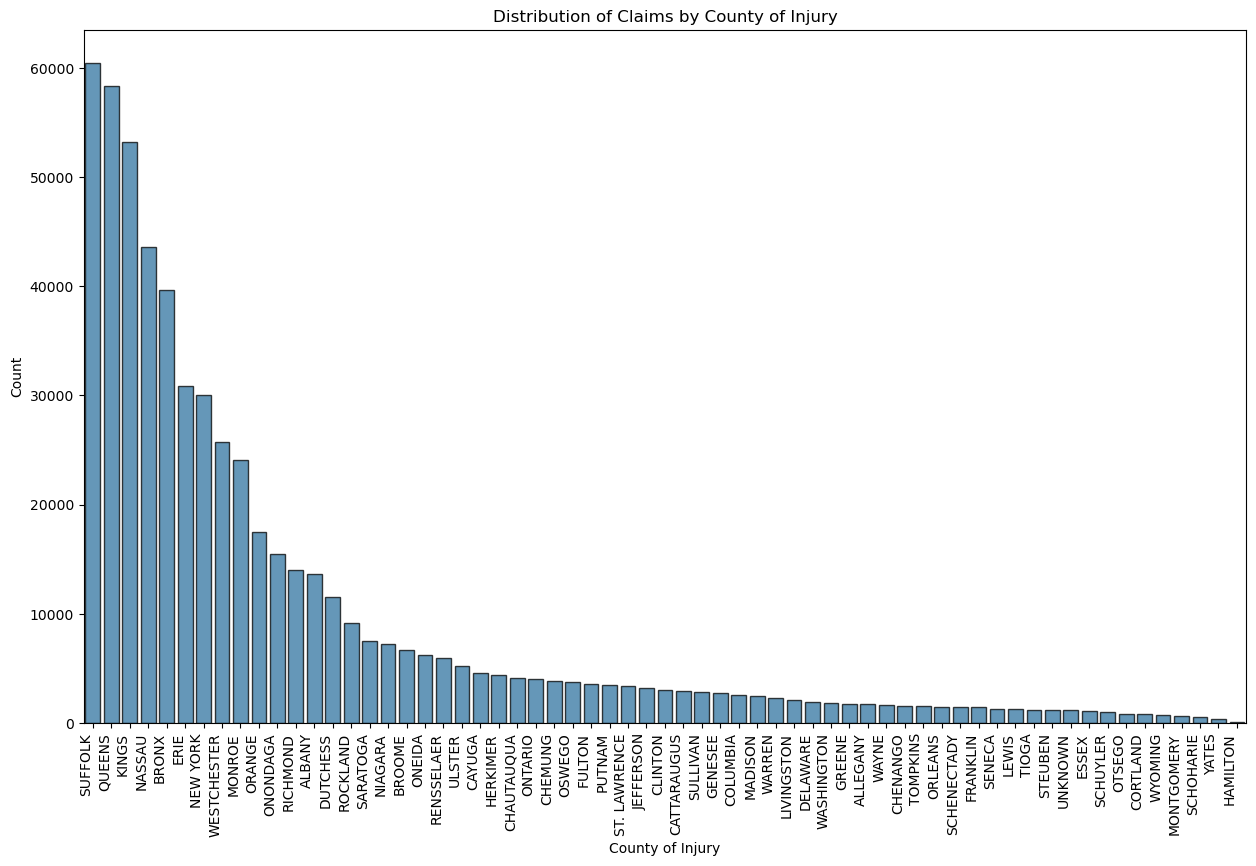

In [30]:
# Distribution of Claims by County of Injury
plt.figure(figsize=(15, 9))
sns.countplot(x='County of Injury', data=train_data, alpha=0.75, edgecolor='black', order=train_data['County of Injury'].value_counts().index)
plt.title('Distribution of Claims by County of Injury')
plt.xlabel('County of Injury')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()


In [17]:
df['County of Injury'].unique()

array(['ST. LAWRENCE', 'WYOMING', 'ORANGE', nan, 'DUTCHESS', 'SUFFOLK',
       'ONONDAGA', 'RICHMOND', 'MONROE', 'KINGS', 'NEW YORK', 'QUEENS',
       'WESTCHESTER', 'GREENE', 'NASSAU', 'ALBANY', 'ERIE', 'BRONX',
       'CAYUGA', 'NIAGARA', 'LIVINGSTON', 'WASHINGTON', 'MADISON',
       'WARREN', 'SENECA', 'GENESEE', 'SARATOGA', 'CHAUTAUQUA',
       'COLUMBIA', 'RENSSELAER', 'CATTARAUGUS', 'ROCKLAND', 'SCHUYLER',
       'BROOME', 'ULSTER', 'CLINTON', 'ONEIDA', 'UNKNOWN', 'MONTGOMERY',
       'ONTARIO', 'SCHENECTADY', 'CHEMUNG', 'YATES', 'HERKIMER',
       'ALLEGANY', 'TIOGA', 'FULTON', 'DELAWARE', 'TOMPKINS', 'PUTNAM',
       'OSWEGO', 'LEWIS', 'ESSEX', 'OTSEGO', 'CORTLAND', 'ORLEANS',
       'SULLIVAN', 'CHENANGO', 'FRANKLIN', 'WAYNE', 'JEFFERSON',
       'STEUBEN', 'SCHOHARIE', 'HAMILTON'], dtype=object)

c:\Users\inesm\anaconda3\envs\DM2425\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


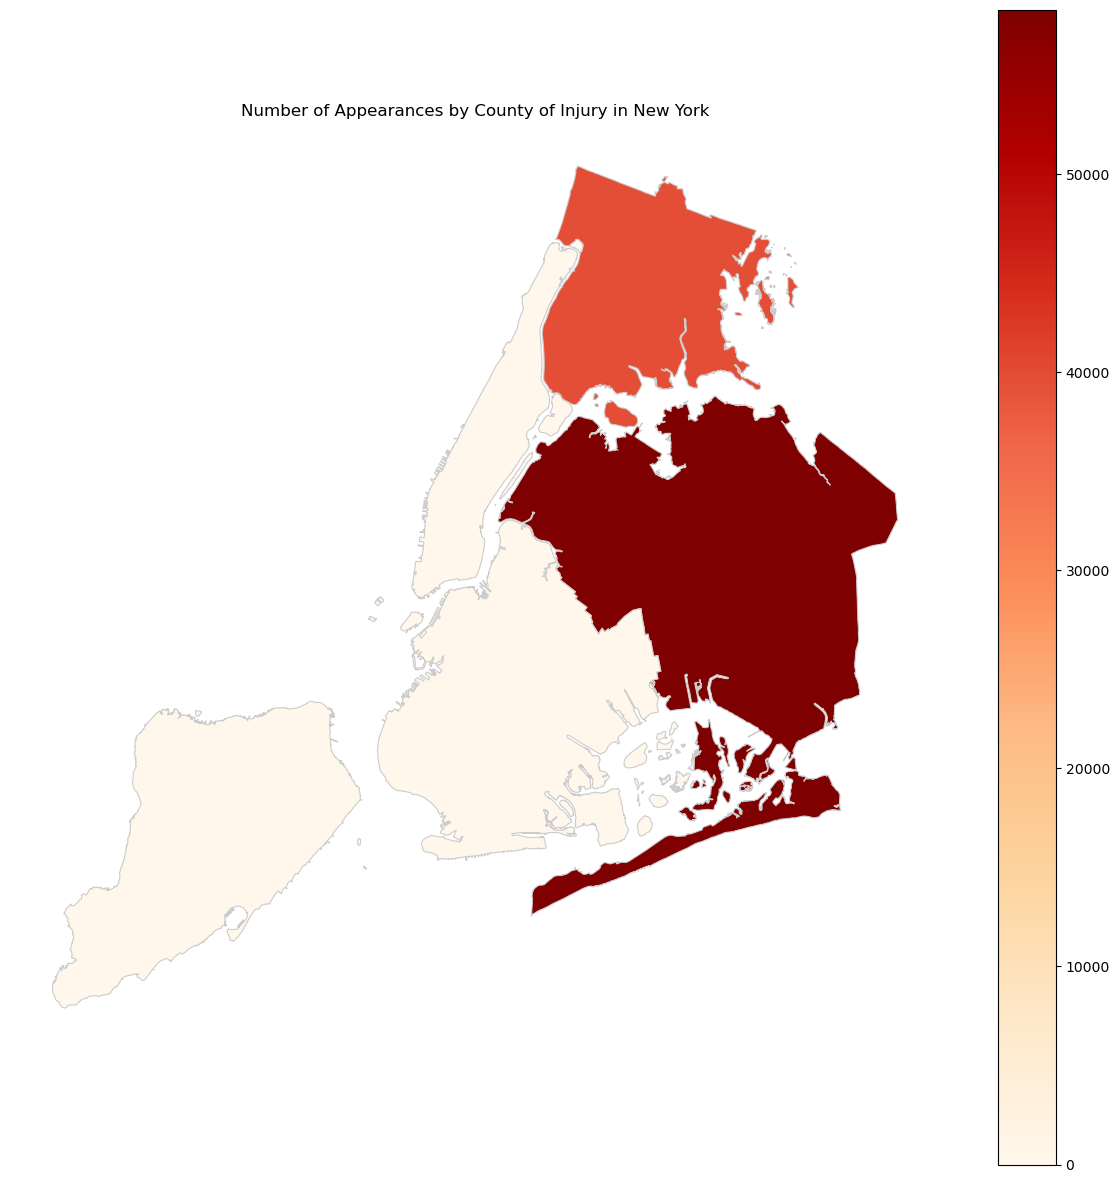

  County of Injury  Count
0          suffolk  60430
1           queens  58333
2            kings  53207
3           nassau  43580
4            bronx  39618


In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load a shapefile of New York City boroughs
ny_counties = gpd.read_file(gpd.datasets.get_path('nybb'))
ny_counties = ny_counties.to_crs(epsg=4326)

# Convert borough names to lowercase for consistency
ny_counties['BoroName'] = ny_counties['BoroName'].str.lower()

# Aggregating the data by County of Injury
county_appearance_counts = train_data['County of Injury'].str.lower().value_counts().reset_index()
county_appearance_counts.columns = ['County of Injury', 'Count']

# Merging with shapefile data to get geometries
ny_map_data = ny_counties.merge(county_appearance_counts, left_on='BoroName', right_on='County of Injury', how='left')

# Fill NaN values in Count column
ny_map_data['Count'] = ny_map_data['Count'].fillna(0)

# Plotting the map
fig, ax = plt.subplots(figsize=(15, 15))
ny_map_data.plot(column='Count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Number of Appearances by County of Injury in New York')
plt.axis('off')
plt.show()
# Print the top 5 counties based on appearance counts
top_5_counties = county_appearance_counts.head(5)
print(top_5_counties)



### Features vs Target Feature

#### Age at Injury vs. Average Weekly Wage

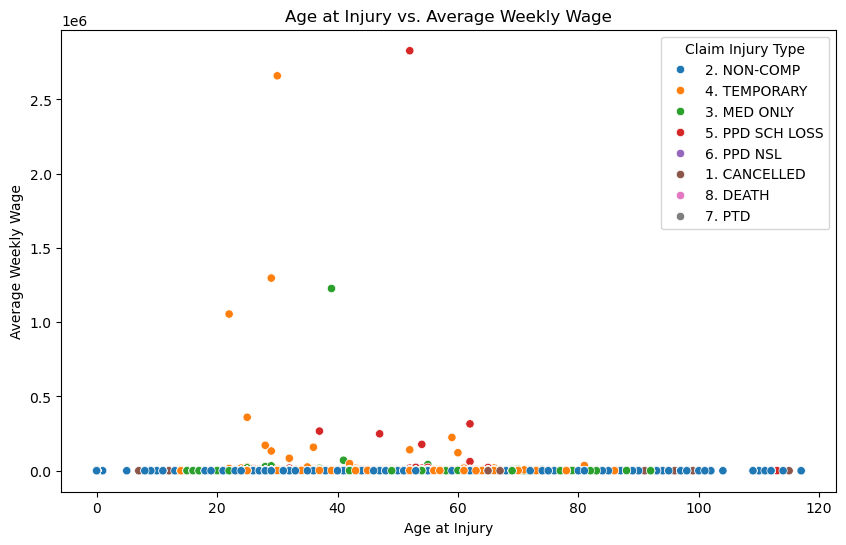

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age at Injury', y='Average Weekly Wage', hue='Claim Injury Type', data=train_data)
plt.title('Age at Injury vs. Average Weekly Wage')
plt.xlabel('Age at Injury')
plt.ylabel('Average Weekly Wage')
plt.show()

As we can see there's a lot a values of "Average Weekly Wage" equal to zero, we have to decide what to do wiith it

In [6]:
df[df['Average Weekly Wage']==0].shape[0]

335450

#### Age at Injury by Claim Injury Type

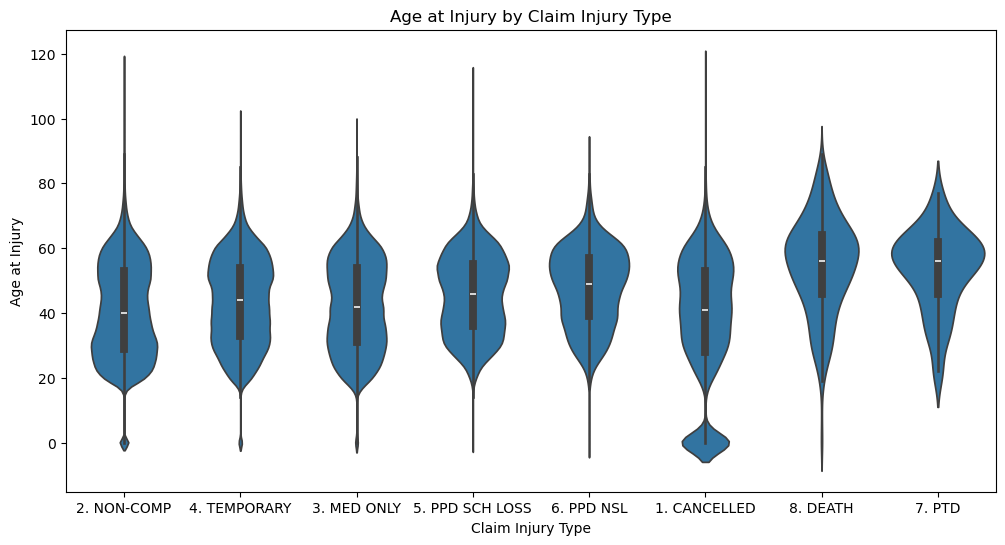

In [8]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Claim Injury Type', y='Age at Injury', data=train_data)
plt.title('Age at Injury by Claim Injury Type')
plt.show()

There is a significante amont of cancelled claims at a young age

#### Stacked Bar Plot for Gender vs. Claim Injury Type

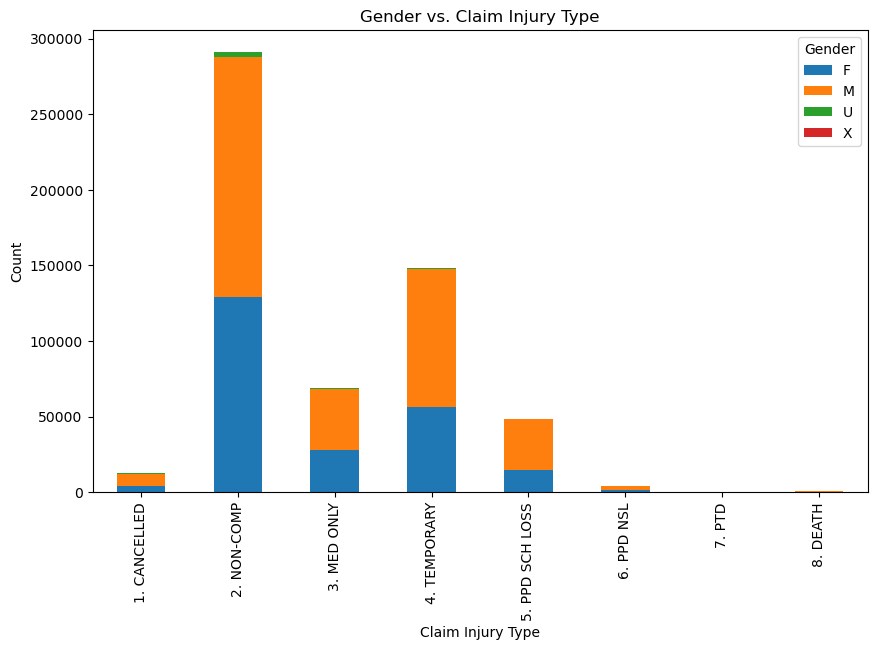

In [9]:
pd.crosstab(train_data['Claim Injury Type'],train_data['Gender']).plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender vs. Claim Injury Type')
plt.xlabel('Claim Injury Type')
plt.ylabel('Count')
plt.show()

There's only a significant difference in Female and Male in PPD SCH LOSS

#### WCIO Part Of Body Description by Claim Injury Type


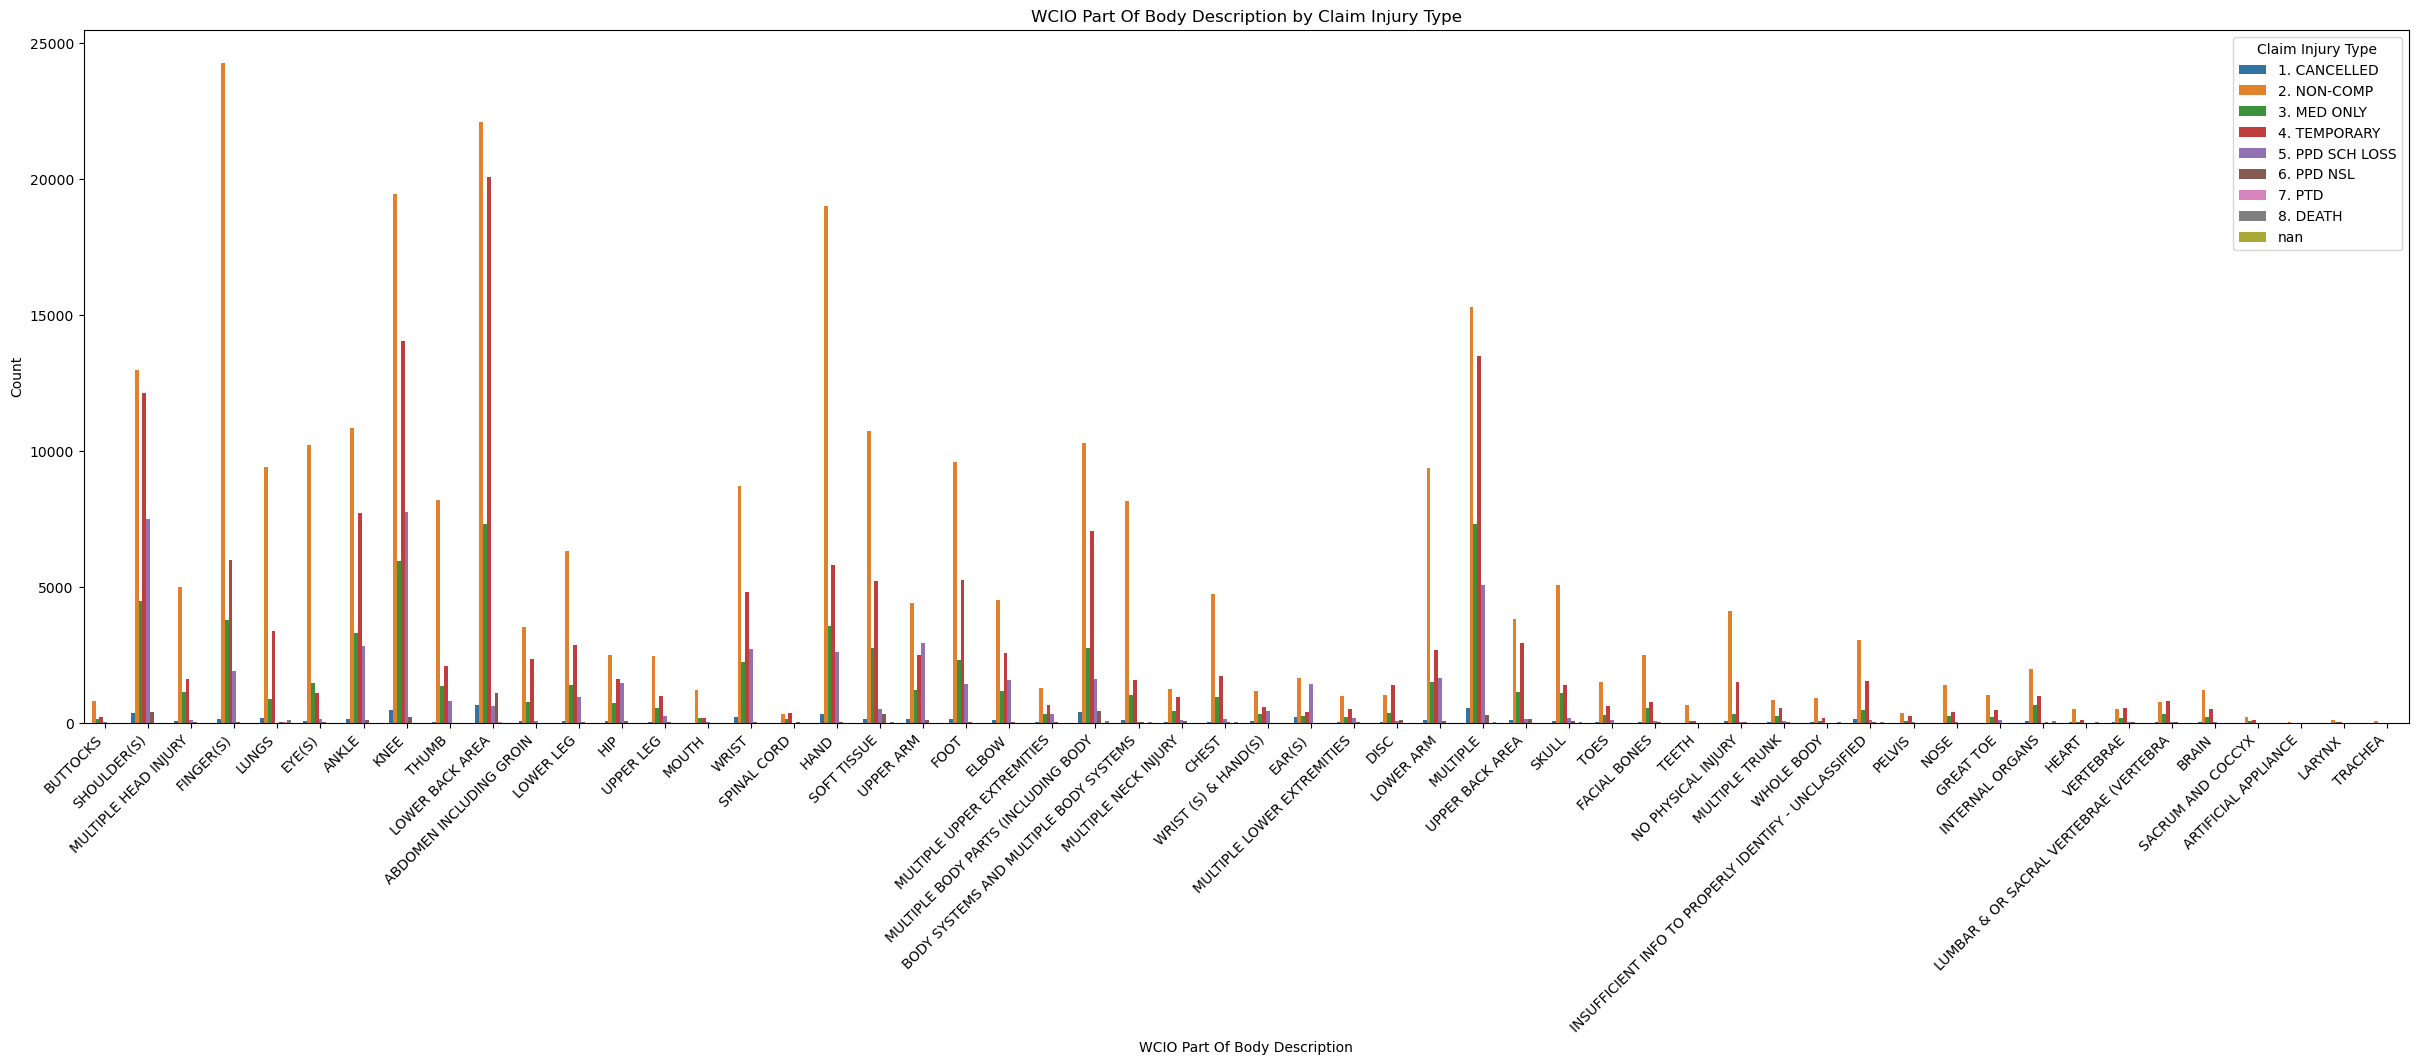

In [25]:
# WCIO Part Of Body Code by Claim Injury Type
plt.figure(figsize=(30, 9))
hue_order = sorted(train_data['Claim Injury Type'].unique(), key=lambda x: str(x))  # Convert all unique values to strings before sorting
sns.countplot(x='WCIO Part Of Body Description', hue='Claim Injury Type', data=train_data,hue_order=hue_order)
plt.title('WCIO Part Of Body Description by Claim Injury Type')
plt.xlabel('WCIO Part Of Body Description')
plt.ylabel('Count')
plt.legend(title='Claim Injury Type')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Carrier Type by Claim Injury Type

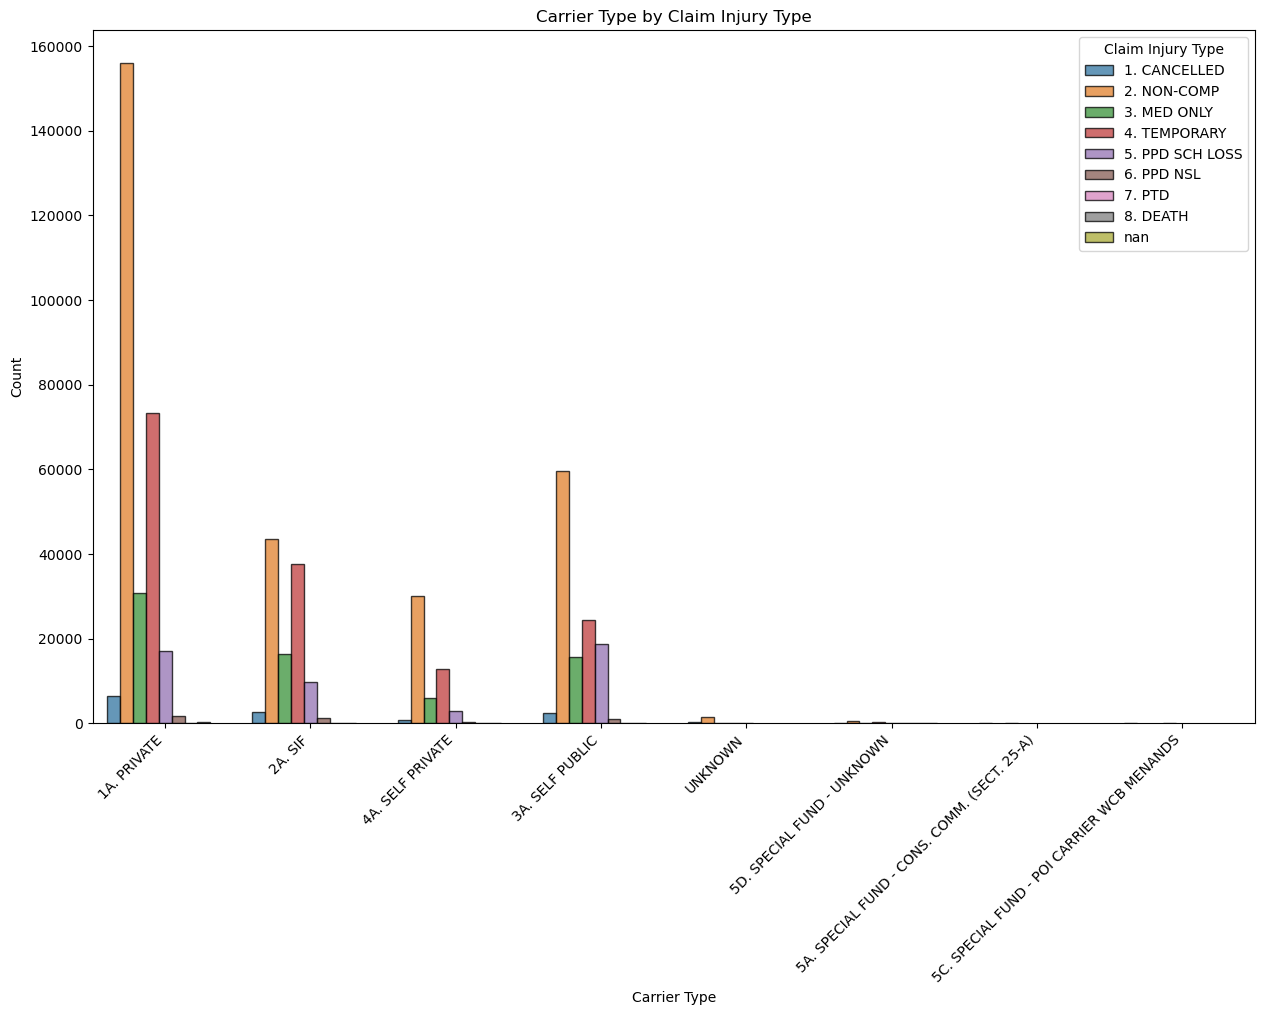

In [21]:
# Carrier Type by Claim Injury Type
plt.figure(figsize=(15, 9))
hue_order = sorted(train_data['Claim Injury Type'].unique(), key=lambda x: str(x))  # Convert all unique values to strings before sorting
sns.countplot(x='Carrier Type', hue='Claim Injury Type', data=train_data, alpha=0.75, edgecolor='black', hue_order=hue_order)
plt.title('Carrier Type by Claim Injury Type')
plt.xlabel('Carrier Type')
plt.ylabel('Count')
plt.legend(title='Claim Injury Type', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()


#### COVID-19 Indicator by Claim Injury Type

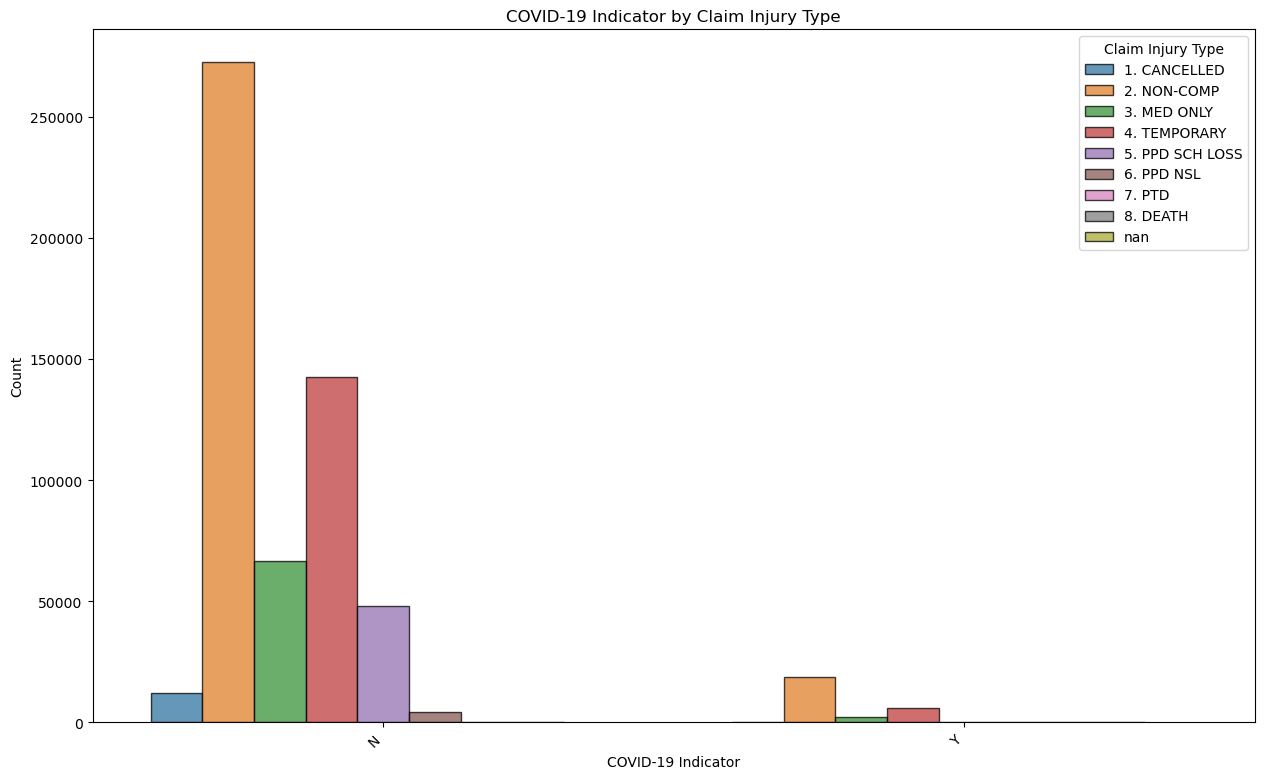

In [26]:
# COVID-19 Indicator by Claim Injury Type
plt.figure(figsize=(15, 9))
hue_order = sorted(train_data['Claim Injury Type'].unique(), key=lambda x: str(x))  # Convert all unique values to strings before sorting
sns.countplot(x='COVID-19 Indicator', hue='Claim Injury Type', data=train_data, alpha=0.75, edgecolor='black',hue_order=hue_order)
plt.title('COVID-19 Indicator by Claim Injury Type')
plt.xlabel('COVID-19 Indicator')
plt.ylabel('Count')
plt.legend(title='Claim Injury Type')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Pairwise Relationship of Numerical Variables

In [17]:
# numerical features only
num_feat = list(df.select_dtypes(include='number').columns)
print(num_feat)

# remove categorical variable with code
num_feat = [col for col in num_feat if 'Code' not in col]
num_feat = [col for col in num_feat if 'Description' not in col]
num_feat

['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Industry Code', 'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Agreement Reached', 'Number of Dependents']


['Age at Injury',
 'Average Weekly Wage',
 'Birth Year',
 'IME-4 Count',
 'Agreement Reached',
 'Number of Dependents']

### Pairwise Relashionships

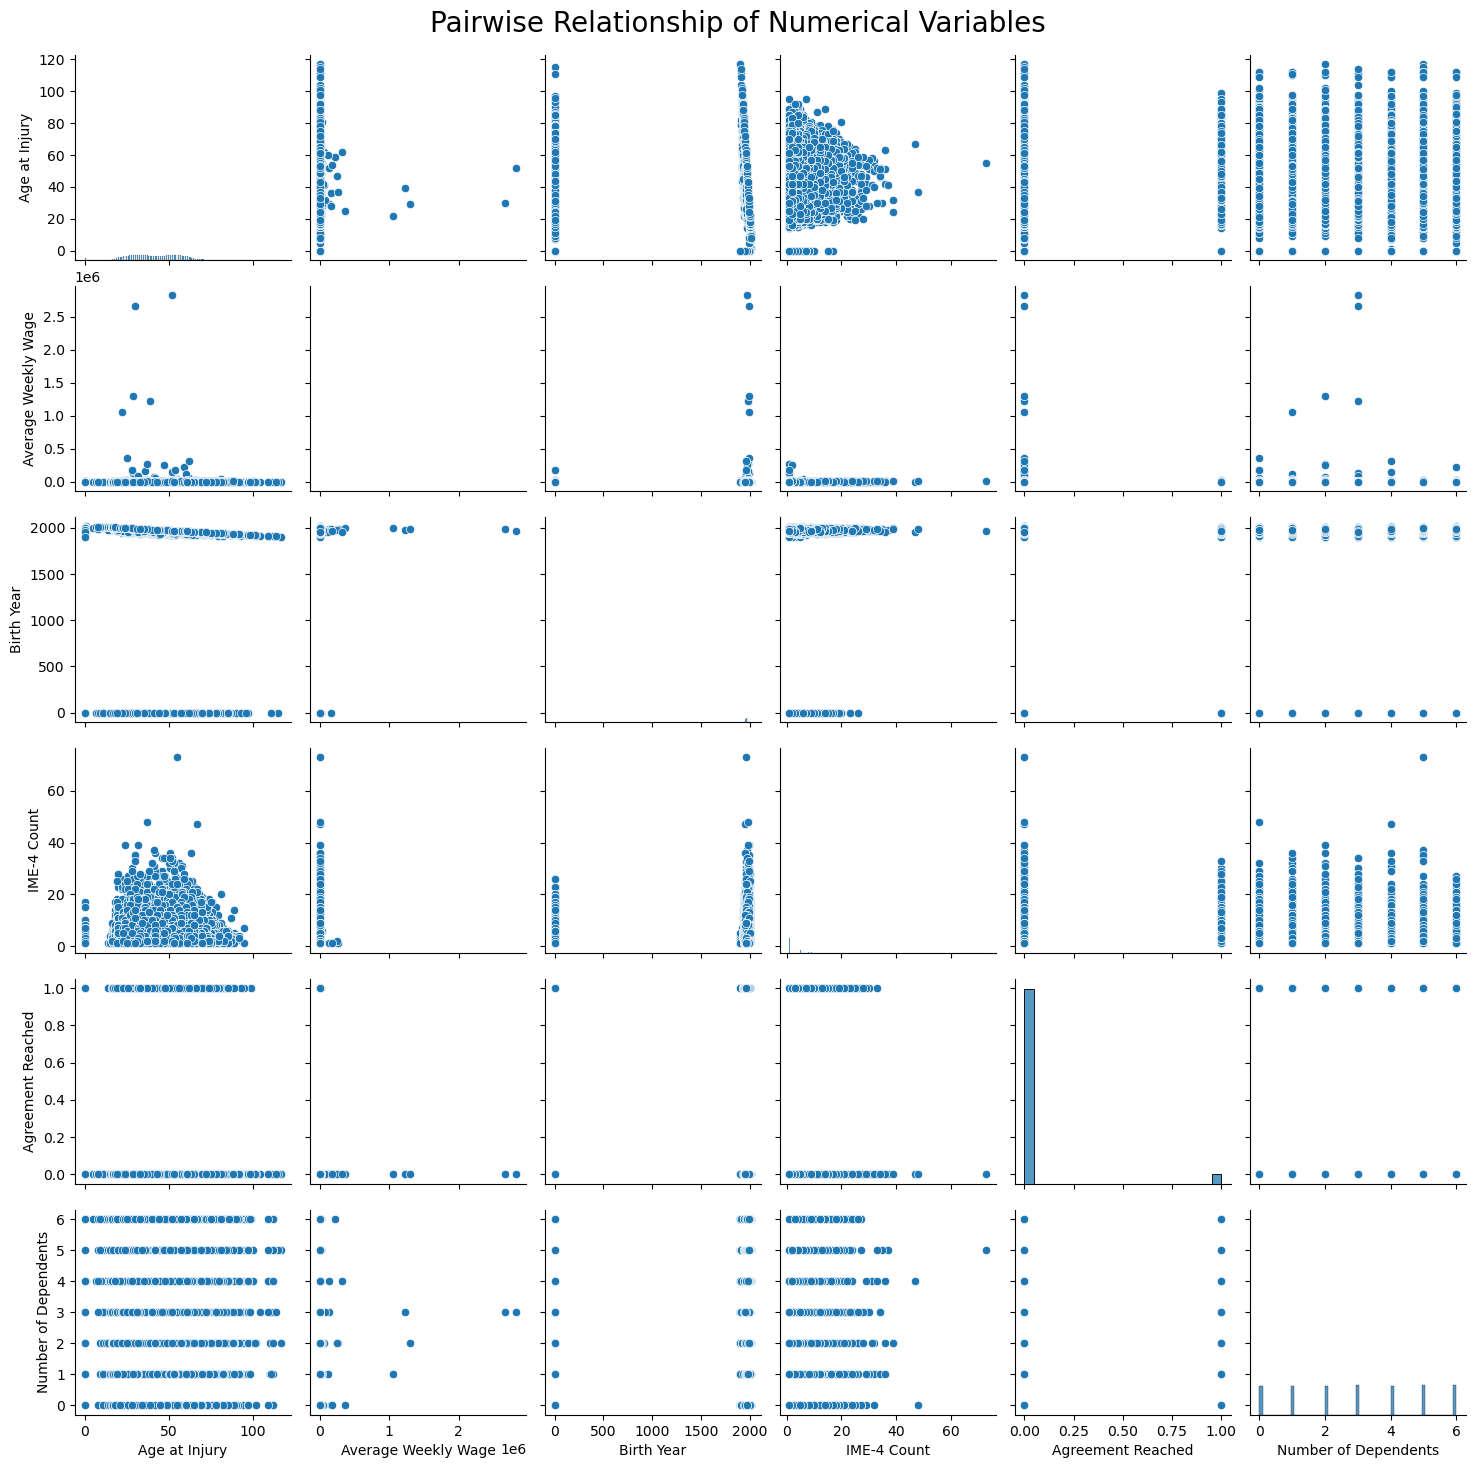

In [18]:
sns.pairplot(train_data[num_feat], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()